In [1]:
import pandas as pd 
import anndata as ad 
import numpy as np 
import matplotlib.pyplot as plt 

In [11]:
base_stripped_spectra = '/data/peer/rsaha/supervised-spectra/scripts/results/'

stripped_spectra = {
'cell_scores': f'{base_stripped_spectra}cui23_processed_spectrav2_example_20241216_spectra_epochs_10000-time_1740428884.7412221cellscores.csv',
'gene_weights': f'{base_stripped_spectra}cui23_processed_spectrav2_example_20241216_spectra_epochs_10000-time_1740428884.7412221geneweights.csv',
'adata': f'{base_stripped_spectra}cui23_processed_spectrav2_example_20241216_spectra_epochs_10000-time_1740428884.7412221.h5ad',
'markers': f'{base_stripped_spectra}cui23_processed_spectrav2_example_20241216_spectra_epochs_10000-time_1740428884.7412221markers.csv',
'model': f'{base_stripped_spectra}cui23_processed_spectrav2_example_20241216_spectra_epochs_10000-time_1740428884.7412221.pickle'
}

In [5]:
base_regular_spectra = '/data/peer/rsaha/supervised-spectra/scripts/results/regular_spectra_outputs/'

regular_spectra = {
'adata': f'{base_regular_spectra}adata_with_spectra.h5ad',
'cell_scores': f'{base_regular_spectra}output_postprocessingcui23_processed_spectrav2_example_20241216_spectra_epochs_10000-time_1736835731.1690764cellscores.csv',
'gene_weights': f'{base_regular_spectra}output_postprocessingcui23_processed_spectrav2_example_20241216_spectra_epochs_10000-time_1736835731.1690764geneweights.csv',
'model': f'{base_regular_spectra}spectra_model.pickle'
}

# Load data

In [9]:
stripped_spectra_cell_scores = pd.read_csv(stripped_spectra['cell_scores'], index_col=0)

In [10]:
stripped_spectra_cell_scores

,global_0,global_1,global_2,global_3,global_4,global_5,global_6,global_7,global_8,global_9,...,PBS_158,PBS_159,PBS_160,PBS_161,PBS_162,PBS_163,PBS_164,PBS_165,PBS_166,PBS_167
AAAGGGCCAACACAGG_01,8.442071e-04,1.313528e-02,3.188203e-10,1.171915e-10,8.891902e-04,3.486313e-04,2.502750e-08,2.563335e-08,1.447786e-10,0.003495,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
ACACAGTAGCTGCCTG_01,8.296846e-04,8.997256e-03,9.217835e-04,1.957121e-11,4.229423e-11,9.752557e-04,9.493365e-09,2.410451e-03,6.625048e-11,0.001667,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
ACAGAAACACGCGGTT_01,6.120946e-04,1.594623e-08,1.364585e-10,3.374164e-11,7.348695e-03,2.254494e-09,2.273381e-09,1.710968e-03,2.639100e-06,0.000003,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
ACCACAAGTCAACCTA_01,1.457348e-03,1.254625e-02,6.947888e-04,9.209811e-11,1.923026e-10,1.664256e-10,5.755731e-04,2.513779e-03,4.870802e-11,0.000341,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
ACCATTTCATCGAGCC_01,8.911680e-07,8.283935e-03,1.535958e-04,2.333182e-11,6.556377e-11,4.449324e-04,1.840564e-03,1.477464e-03,4.275694e-11,0.003594,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGAGTCACACCGGAAA_42,6.863818e-04,5.556153e-03,2.843942e-04,1.780897e-06,4.416187e-11,3.540515e-10,4.525328e-04,8.624374e-04,3.865379e-10,0.001112,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
ACTCTCGCAAACAGGC_44,7.071057e-04,5.255396e-11,6.013094e-09,2.942788e-09,8.581543e-04,1.472894e-04,9.514257e-09,8.775598e-07,8.277954e-11,0.000773,...,0.000199,1.138928e-09,6.989534e-10,0.025602,6.569973e-10,0.010727,0.002231,1.721185e-06,0.005186,0.091785
GGTTAACAGGTTAAAC_44,5.031070e-07,6.131743e-03,9.145850e-04,2.778608e-03,1.871701e-03,2.814763e-09,1.456536e-06,5.904998e-04,5.422088e-11,0.000911,...,0.000430,2.068639e-09,3.150271e-03,0.019328,6.759406e-10,0.009965,0.001665,7.713296e-07,0.000540,0.056885
AATGAAGAGCACTTTG_45,2.106967e-04,3.483576e-03,1.209556e-11,1.284621e-10,1.781374e-03,1.052963e-03,8.439043e-04,8.417705e-04,1.373379e-02,0.001585,...,0.000843,6.535063e-03,1.676395e-07,0.010771,4.060765e-02,0.001132,0.011811,6.775680e-10,0.000336,0.035582


In [14]:
stripped_spectra_gene_weights = pd.read_csv(stripped_spectra['gene_weights'], index_col=0)

In [15]:
stripped_spectra_gene_weights

,1110004E09Rik,1110004F10Rik,1110008F13Rik,1110032F04Rik,1500009L16Rik,1700025G04Rik,1700097N02Rik,1810034E14Rik,1810037I17Rik,2310009B15Rik,...,Zfyve1,Zgrf1,Zmat1,Zmat3,Zmiz2,Zmym1,Zmynd19,Zwilch,Zwint,Zyx
global_0,9.959442e-19,3.375588e-14,6.054205e-14,9.665395e-14,7.627176e-16,4.400655e-16,2.768054e-11,5.660306e-18,5.611532e-14,2.198659e-14,...,5.632050e-18,8.442423e-17,2.710870e-16,7.079961e-15,2.925554e-14,5.803703e-17,1.312036e-12,3.690182e-17,1.828098e-15,1.889266e-15
global_1,3.266035e-19,5.675620e-05,1.453101e-13,9.438891e-07,3.018239e-16,4.126147e-05,4.188464e-05,4.601743e-18,7.093411e-14,2.710705e-05,...,1.219899e-15,4.536469e-17,2.053127e-14,3.396533e-13,4.892573e-14,8.151724e-17,2.489417e-13,3.310344e-17,2.056885e-14,2.121880e-15
global_2,7.463405e-19,4.018685e-14,1.618846e-13,1.340623e-13,4.191753e-16,5.332052e-15,2.940879e-11,1.260002e-17,5.111736e-14,2.516990e-14,...,4.432856e-18,6.265816e-17,8.915754e-15,1.918719e-11,4.765210e-14,1.998056e-16,1.427928e-12,5.331181e-17,2.239421e-12,3.759370e-15
global_3,2.980379e-19,2.491521e-13,5.562628e-14,7.638638e-14,5.283432e-16,2.633144e-13,6.108451e-11,4.341364e-18,3.651145e-14,7.727669e-15,...,3.179886e-17,5.397311e-17,1.153369e-14,4.622220e-11,1.857560e-14,1.678704e-16,6.510521e-12,5.100281e-17,1.919847e-11,2.456939e-15
global_4,3.220408e-19,1.592074e-04,6.759109e-14,1.539009e-13,3.507930e-16,9.600737e-16,7.326001e-08,4.372227e-18,7.304968e-14,6.004207e-13,...,3.223560e-18,6.345942e-17,8.410314e-15,2.486333e-04,6.483148e-15,9.187387e-17,5.431074e-13,7.908182e-17,6.820933e-05,2.716634e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PBS_163,1.115250e-08,2.421616e-04,1.065420e-14,1.453133e-14,2.433074e-15,1.137940e-17,1.206174e-11,8.336003e-12,1.129379e-04,1.197278e-13,...,1.389108e-04,2.363485e-15,4.766683e-05,1.958436e-15,1.663100e-15,6.546575e-08,6.867505e-14,2.296469e-15,3.674636e-16,1.560364e-11
PBS_164,6.466000e-11,1.804703e-14,5.453867e-17,7.658449e-15,1.073706e-15,1.305163e-12,3.344696e-11,1.601104e-04,8.847722e-05,1.624667e-13,...,4.099280e-11,1.434916e-15,1.041328e-08,9.446332e-16,4.729272e-15,1.463320e-07,4.805845e-14,2.056100e-15,3.286762e-16,5.369564e-12
PBS_165,7.570038e-11,3.027440e-09,6.223157e-13,2.341772e-14,3.404106e-15,3.090982e-14,6.819509e-11,6.714197e-09,2.948228e-06,2.335891e-13,...,5.267607e-11,3.514281e-15,4.252738e-12,3.029903e-15,3.060993e-15,7.958840e-11,2.849316e-13,2.152327e-15,3.781150e-16,2.118548e-09
PBS_166,1.227300e-06,2.410901e-04,1.214781e-04,7.154162e-15,2.233519e-15,5.028117e-05,3.501850e-11,1.155537e-04,2.151552e-04,2.129057e-13,...,2.882698e-08,1.817352e-15,3.056978e-06,2.298706e-15,8.232586e-04,3.433864e-11,1.029844e-13,2.450867e-15,4.240668e-16,1.566611e-04


In [17]:
regular_spectra_cell_scores = pd.read_csv(regular_spectra['cell_scores'], index_col=0)

In [18]:
regular_spectra_cell_scores

,global_0,global_1,global_2,global_3,global_4,global_5,global_6,global_7,global_8,global_9,...,PBS_158,PBS_159,PBS_160,PBS_161,PBS_162,PBS_163,PBS_164,PBS_165,PBS_166,PBS_167
AAAGGGCCAACACAGG_01,5.446629e-04,1.211802e-02,2.610661e-12,1.294392e-11,9.014293e-11,2.671189e-04,4.001348e-03,6.767432e-09,1.444523e-11,2.733561e-03,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
ACACAGTAGCTGCCTG_01,6.781366e-04,5.863766e-03,1.009655e-03,6.407508e-10,1.535454e-03,5.394775e-03,2.996277e-03,1.976608e-03,2.539116e-10,1.576899e-03,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
ACAGAAACACGCGGTT_01,6.630811e-04,9.601797e-07,1.124722e-11,4.908399e-12,3.291142e-09,4.941511e-08,6.136099e-04,2.008781e-04,6.219133e-03,1.974487e-07,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
ACCACAAGTCAACCTA_01,9.117531e-04,1.012441e-02,3.614326e-04,1.685760e-11,1.970382e-11,2.300226e-03,3.918298e-04,1.942297e-03,3.828597e-12,1.622738e-04,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
ACCATTTCATCGAGCC_01,2.681201e-09,4.953161e-03,7.444645e-12,4.913561e-12,2.588078e-12,2.892346e-11,4.578787e-03,9.054661e-04,6.180926e-12,4.172616e-03,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGAGTCACACCGGAAA_42,4.247615e-04,4.227151e-03,2.673934e-04,2.169060e-03,4.310851e-12,4.864500e-04,1.234294e-03,6.237954e-04,2.157961e-04,7.930510e-04,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
ACTCTCGCAAACAGGC_44,4.057777e-04,8.497220e-12,1.670631e-04,3.058525e-03,7.400687e-04,1.038250e-08,2.490750e-08,7.885757e-07,3.490029e-12,5.686267e-04,...,0.002607,2.634663e-04,3.815458e-11,0.022362,6.894005e-04,0.001967,0.007833,2.951930e-03,0.000507,0.070230
GGTTAACAGGTTAAAC_44,2.246728e-08,6.884667e-03,6.093173e-04,1.552775e-07,1.349818e-03,1.937774e-03,2.489507e-04,4.324074e-04,3.182868e-11,1.095951e-03,...,0.008077,2.178744e-10,1.170342e-02,0.014273,9.916996e-11,0.003873,0.005998,4.743820e-07,0.000104,0.032709
AATGAAGAGCACTTTG_45,4.293370e-04,4.736144e-03,3.860991e-05,1.333351e-03,2.032383e-03,2.366198e-03,8.572410e-04,1.067763e-03,2.738251e-02,1.501612e-03,...,0.002076,7.985579e-04,4.406979e-03,0.008116,5.440084e-02,0.000870,0.004908,1.886572e-03,0.000523,0.000720


In [19]:
regular_spectra_gene_weights = pd.read_csv(regular_spectra['gene_weights'], index_col=0)

In [20]:
regular_spectra_gene_weights

,1110004E09Rik,1110004F10Rik,1110008F13Rik,1110032F04Rik,1500009L16Rik,1700025G04Rik,1700097N02Rik,1810034E14Rik,1810037I17Rik,2310009B15Rik,...,Zfyve1,Zgrf1,Zmat1,Zmat3,Zmiz2,Zmym1,Zmynd19,Zwilch,Zwint,Zyx
global_0,1.762089e-15,3.108397e-15,1.653451e-15,5.202113e-19,4.828123e-18,3.521155e-14,3.679541e-13,1.084942e-18,4.115991e-14,2.672393e-17,...,3.056134e-17,4.820477e-17,6.483831e-18,9.561459e-16,3.143949e-23,3.137250e-18,5.109876e-19,7.918552e-14,1.631435e-13,1.747588e-14
global_1,1.372224e-08,6.734665e-15,1.863915e-14,6.020026e-19,3.665316e-18,6.250499e-05,8.611686e-06,3.661403e-18,6.043090e-05,6.215857e-08,...,7.166492e-15,2.050100e-17,4.191309e-18,6.686228e-15,5.105530e-22,5.905975e-18,5.650682e-19,3.805590e-15,4.558180e-14,1.209590e-15
global_2,1.824794e-15,1.570288e-15,2.092400e-15,5.021369e-19,6.177596e-18,4.441963e-14,3.548076e-13,9.783924e-19,4.887683e-14,1.331518e-16,...,1.607199e-16,1.223106e-17,4.537750e-18,1.663497e-17,1.377668e-21,3.675464e-18,3.252746e-19,9.006982e-14,5.324285e-15,2.602925e-14
global_3,1.839903e-15,2.935912e-15,1.393403e-15,3.860356e-19,7.218733e-18,1.654982e-14,8.415986e-09,2.539132e-18,9.288719e-14,1.035931e-16,...,5.619015e-16,1.291680e-17,3.399539e-18,1.824729e-04,4.103332e-22,3.253313e-18,2.796245e-19,1.466305e-14,8.103582e-13,3.342418e-15
global_4,9.723209e-14,1.802990e-15,9.576342e-16,3.537425e-19,7.125901e-18,3.447449e-14,1.264895e-04,8.799038e-19,2.839546e-04,5.899523e-16,...,3.300805e-16,1.593376e-17,6.870113e-18,2.638971e-15,3.974902e-22,2.935112e-18,5.608078e-19,3.271509e-14,3.807515e-08,1.358701e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PBS_163,1.865220e-16,1.415021e-14,1.046723e-16,1.823851e-13,3.681793e-17,3.233305e-22,3.733975e-16,3.661106e-18,1.144683e-12,1.156307e-14,...,8.065997e-18,1.656455e-13,2.602037e-16,1.627332e-18,1.013161e-14,2.146289e-13,1.886551e-13,3.860213e-16,7.099909e-15,1.032251e-17
PBS_164,3.510347e-16,2.745567e-15,3.942137e-13,4.166087e-13,8.463558e-19,1.193116e-10,2.200788e-16,8.603741e-05,2.420150e-10,4.573533e-15,...,1.533704e-04,1.047297e-13,1.525857e-08,2.914276e-18,1.224380e-14,9.495773e-05,6.931906e-12,1.523848e-16,7.795271e-15,2.386504e-19
PBS_165,1.810287e-16,1.258339e-04,3.843431e-15,8.380312e-13,4.288294e-16,3.562287e-21,4.181830e-16,2.210736e-17,1.766974e-12,1.339912e-14,...,5.469685e-16,3.010880e-07,3.901893e-15,6.060654e-19,8.371587e-14,3.580072e-12,3.674661e-08,5.715874e-16,5.228509e-15,1.866336e-17
PBS_166,2.714734e-16,1.001574e-14,1.434390e-15,2.465193e-12,2.957016e-17,4.676430e-22,2.849591e-16,4.871129e-18,2.112186e-13,1.224739e-14,...,6.211868e-17,8.774764e-13,2.657247e-16,2.925281e-18,4.978308e-01,5.461184e-13,1.350804e-12,4.175510e-16,4.289458e-15,9.768381e-18


# Heatmap of factors 

In [21]:
import seaborn as sns

In [22]:
n_factors = stripped_spectra_cell_scores.shape[1]

In [27]:
# Assume these are your DataFrames:
# stripped_spectra_cell_scores and regular_spectra_cell_scores

# Get the factor names (i.e., the DataFrame columns)
stripped_factors = stripped_spectra_cell_scores.columns
regular_factors = regular_spectra_cell_scores.columns


In [35]:
# Create an empty DataFrame to hold the pairwise correlations
corr_matrix_factors = pd.DataFrame(index=stripped_factors, columns=regular_factors, dtype=float)

In [36]:
# Compute the Pearson correlation for each pair of factors
for s in stripped_factors:
    for r in regular_factors:
        corr_matrix_factors.loc[s, r] = stripped_spectra_cell_scores[s].corr(regular_spectra_cell_scores[r])

In [37]:
# Optionally, rename the index and columns for clarity
corr_matrix_factors.index = [f"Stripped_{col}" for col in corr_matrix_factors.index]
corr_matrix_factors.columns = [f"Regular_{col}" for col in corr_matrix_factors.columns]

In [38]:
corr_matrix_factors

,Regular_global_0,Regular_global_1,Regular_global_2,Regular_global_3,Regular_global_4,Regular_global_5,Regular_global_6,Regular_global_7,Regular_global_8,Regular_global_9,...,Regular_PBS_158,Regular_PBS_159,Regular_PBS_160,Regular_PBS_161,Regular_PBS_162,Regular_PBS_163,Regular_PBS_164,Regular_PBS_165,Regular_PBS_166,Regular_PBS_167
Stripped_global_0,0.705418,-0.076505,0.048219,0.057626,-0.016131,0.019254,0.046292,0.016267,0.066056,0.007859,...,0.013191,0.034326,-0.004982,-0.039006,0.014857,0.014202,0.024869,-0.009121,0.018530,-0.043124
Stripped_global_1,-0.177427,0.887893,0.074571,0.032245,-0.118956,0.179633,0.102084,0.018265,-0.190355,0.019449,...,0.136018,0.032763,0.372415,-0.021593,-0.140668,-0.103407,-0.008586,-0.029279,0.038719,-0.180301
Stripped_global_2,-0.037652,0.112998,0.582559,0.030989,-0.000871,0.149046,0.096201,0.100116,0.025343,0.039996,...,-0.008767,-0.011674,0.009617,-0.104049,-0.026343,-0.113590,-0.050807,-0.010027,-0.067785,-0.072505
Stripped_global_3,0.049802,0.081930,-0.022920,0.100733,-0.028382,0.018918,-0.021731,0.008557,-0.025371,-0.000842,...,-0.001927,-0.019942,0.114158,-0.006859,-0.017628,0.051886,0.000748,0.040430,0.018172,-0.038817
Stripped_global_4,0.059117,-0.150333,0.027202,-0.046184,0.570070,-0.117151,-0.023560,0.002065,-0.034197,-0.034187,...,-0.011021,0.089228,-0.038635,-0.046381,-0.003035,0.011106,-0.028957,0.103448,-0.043569,-0.016784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stripped_PBS_163,0.094712,-0.120862,-0.046416,0.066630,-0.027166,-0.221474,-0.210709,-0.152176,0.108828,-0.062049,...,0.043800,0.135347,0.092524,0.050680,0.121579,0.759506,0.626292,0.103769,0.149570,0.010858
Stripped_PBS_164,0.044591,0.001684,0.010149,0.065314,0.024254,-0.184057,-0.189241,-0.101939,0.030918,-0.057678,...,0.075865,0.092202,0.141455,-0.001595,0.136813,0.164588,0.561695,0.145540,0.090173,-0.046395
Stripped_PBS_165,0.030986,-0.034091,-0.013299,-0.002525,-0.024718,-0.088125,-0.044985,-0.062931,-0.008804,-0.038467,...,0.129739,-0.003127,0.015098,0.057707,0.038697,0.015474,0.049795,0.260195,0.050268,0.043832
Stripped_PBS_166,0.034375,-0.054765,-0.053619,0.003077,0.167837,-0.256930,-0.318577,-0.162776,-0.192986,-0.195508,...,0.498476,0.104503,0.263982,0.042918,-0.006892,0.091302,0.148020,0.342891,0.175840,-0.033663


<Axes: >

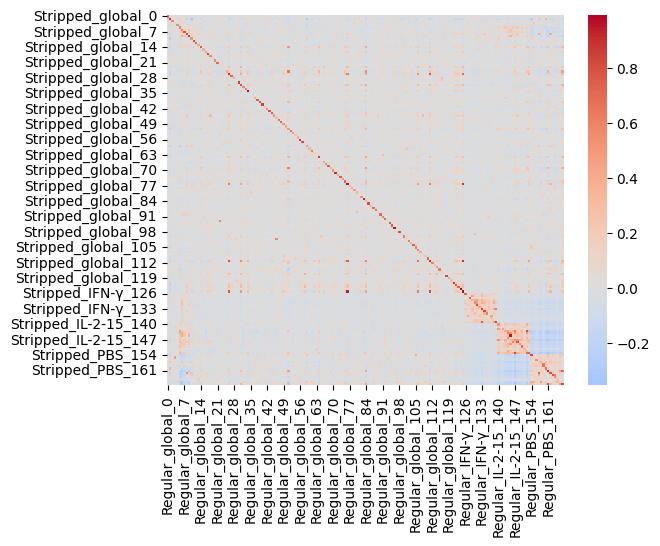

In [59]:
sns.heatmap(corr_matrix_factors, cmap="coolwarm", center=0)

<Axes: >

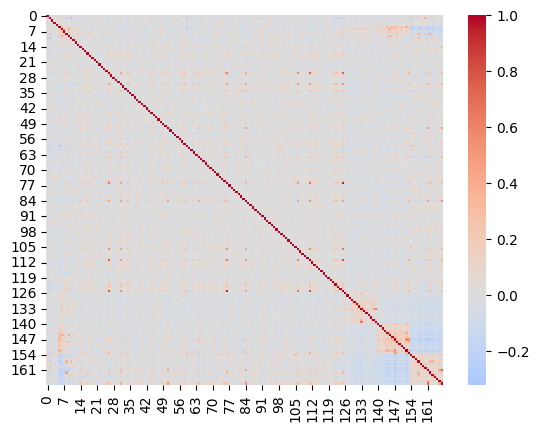

In [65]:
sns.heatmap(np.corrcoef(regular_spectra_cell_scores.T), cmap="coolwarm", center=0)

In [39]:
# Plot the correlation matrix using seaborn's clustermap
g = sns.clustermap(corr_matrix_factors, cmap="coolwarm")
# plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
plt.show()

## Linear sum assignment

In [73]:
import scipy 

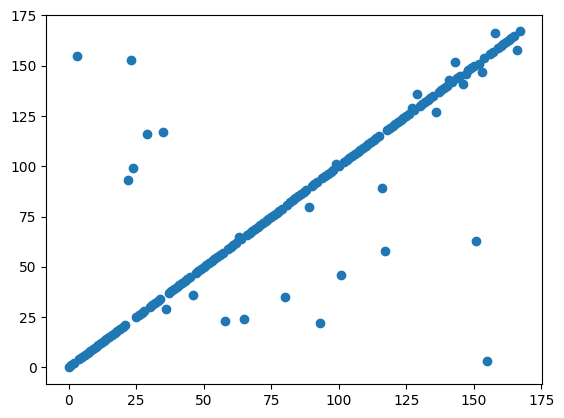

In [82]:
opt = scipy.optimize.linear_sum_assignment(1 - corr_matrix_factors.values) 
plt.scatter(opt[0], opt[1])

In [83]:
opt[1]

array([  0,   1,   2, 155,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  93, 153,  99,  25,
        26,  27,  28, 116,  30,  31,  32,  33,  34, 117,  29,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  36,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  23,  59,  60,  61,  62,  65,  64,
        24,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  35,  81,  82,  83,  84,  85,  86,  87,  88,  80,  90,
        91,  92,  22,  94,  95,  96,  97,  98, 101, 100,  46, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,  89,
        58, 118, 119, 120, 121, 122, 123, 124, 125, 126, 129, 128, 136,
       130, 131, 132, 133, 134, 135, 127, 137, 138, 139, 140, 143, 142,
       152, 144, 145, 141, 146, 148, 149, 150,  63, 151, 147, 154,   3,
       156, 157, 166, 159, 160, 161, 162, 163, 164, 165, 158, 167])

<Axes: >

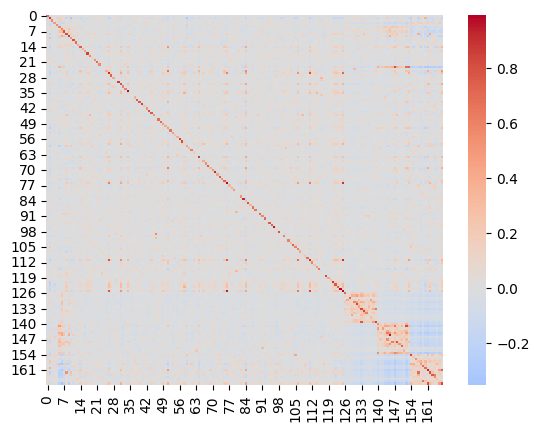

In [85]:
sns.heatmap(corr_matrix_factors.values[opt[1]], cmap="coolwarm", center=0)

<Axes: >

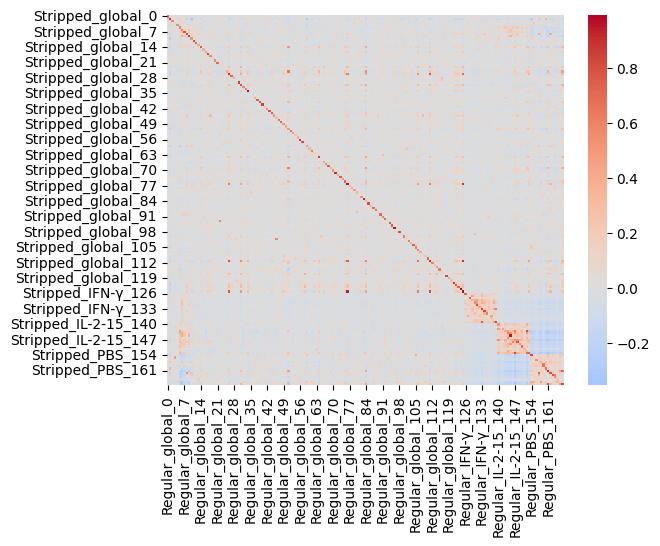

In [59]:
sns.heatmap(corr_matrix_factors, cmap="coolwarm", center=0)

# Heatmap of loadings 

In [40]:
# Assume these are your DataFrames:
# stripped_spectra_gene_weights and regular_spectra_gene_weights
# with loadings as the index and genes as columns.

# Get the loading names (i.e. the DataFrame index)
stripped_loadings = stripped_spectra_gene_weights.index
regular_loadings = regular_spectra_gene_weights.index

# Create an empty DataFrame to hold the pairwise correlations
corr_matrix_loadings = pd.DataFrame(index=stripped_loadings, columns=regular_loadings, dtype=float)

# Compute the Pearson correlation for each pair of loadings (rows)
for s in stripped_loadings:
    for r in regular_loadings:
        corr_matrix_loadings.loc[s, r] = stripped_spectra_gene_weights.loc[s, :].corr(regular_spectra_gene_weights.loc[r, :])

# Optionally, rename the index and columns for clarity
corr_matrix_loadings.index = [f"Stripped_{l}" for l in corr_matrix_loadings.index]
corr_matrix_loadings.columns = [f"Regular_{l}" for l in corr_matrix_loadings.columns]

In [ ]:
# Plot the correlation matrix using seaborn's clustermap without annotations
g = sns.clustermap(corr_matrix_loadings, cmap="coolwarm")
# plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
plt.show()

<Axes: >

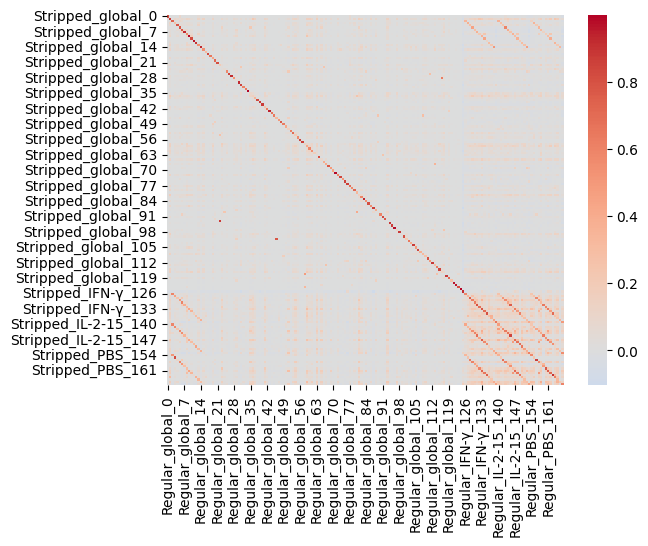

In [61]:
sns.heatmap(corr_matrix_loadings, cmap="coolwarm", center=0)

<Axes: >

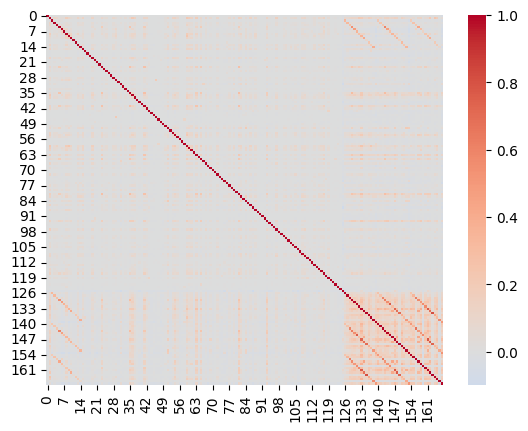

In [66]:
sns.heatmap(np.corrcoef(regular_spectra_gene_weights), cmap="coolwarm", center=0)

# Top events for cells

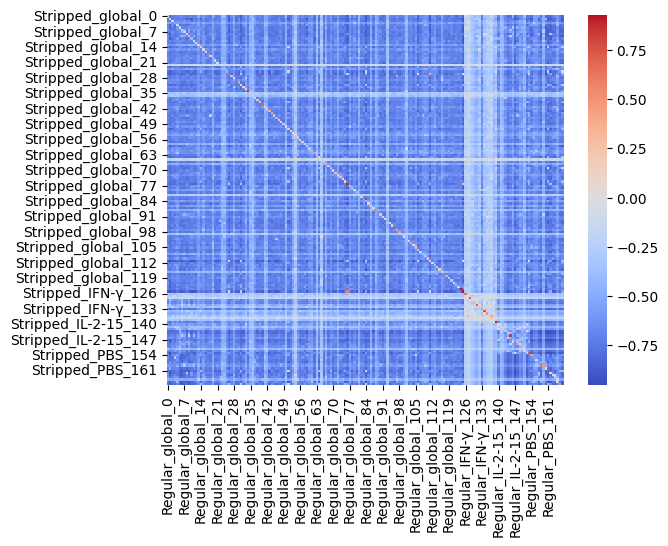

In [62]:
# Assume these are your DataFrames with cell barcodes as index and factors as columns:
# stripped_spectra_cell_scores and regular_spectra_cell_scores

# Get factor names from each DataFrame
factors_stripped = stripped_spectra_cell_scores.columns
factors_regular = regular_spectra_cell_scores.columns

# Create an empty DataFrame for pairwise correlations
corr_matrix = pd.DataFrame(index=factors_stripped, columns=factors_regular, dtype=float)

# For each pair of factors, select the top 100 cells (by score) from each method,
# take the union, and then compute the Pearson correlation on those cells.
for s in factors_stripped:
    for r in factors_regular:
        top_cells_stripped = stripped_spectra_cell_scores[s].nlargest(100).index
        top_cells_regular = regular_spectra_cell_scores[r].nlargest(100).index
        union_cells = top_cells_stripped.union(top_cells_regular)
        
        corr_val = stripped_spectra_cell_scores.loc[union_cells, s].corr(
            regular_spectra_cell_scores.loc[union_cells, r])
        corr_matrix.loc[s, r] = corr_val

# Optionally, rename rows and columns for clarity
corr_matrix.index = [f"Stripped_{col}" for col in corr_matrix.index]
corr_matrix.columns = [f"Regular_{col}" for col in corr_matrix.columns]

# Plot the correlation matrix using seaborn's clustermap (without annotations)
g = sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.show()

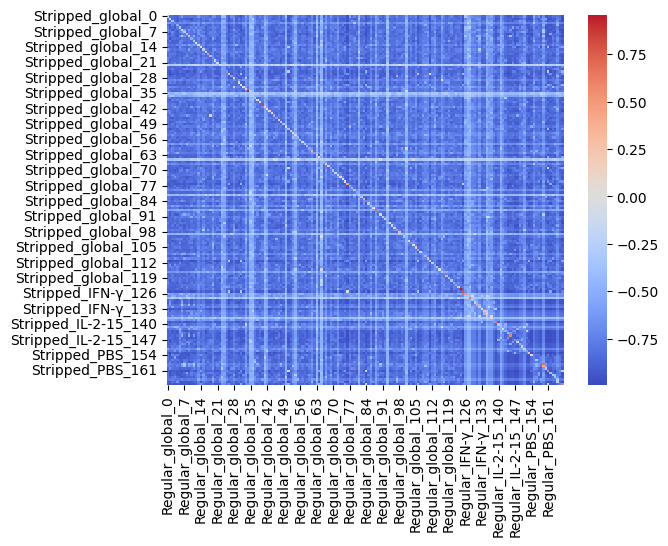

In [67]:
# Assume these are your DataFrames with cell barcodes as index and factors as columns:
# stripped_spectra_cell_scores and regular_spectra_cell_scores

# Get factor names from each DataFrame
factors_stripped = stripped_spectra_cell_scores.columns
factors_regular = regular_spectra_cell_scores.columns

# Create an empty DataFrame for pairwise correlations
corr_matrix = pd.DataFrame(index=factors_stripped, columns=factors_regular, dtype=float)

# For each pair of factors, select the top 100 cells (by score) from each method,
# take the union, and then compute the Pearson correlation on those cells.
for s in factors_stripped:
    for r in factors_regular:
        top_cells_stripped = stripped_spectra_cell_scores[s].nlargest(20).index
        top_cells_regular = regular_spectra_cell_scores[r].nlargest(20).index
        union_cells = top_cells_stripped.union(top_cells_regular)
        
        corr_val = stripped_spectra_cell_scores.loc[union_cells, s].corr(
            regular_spectra_cell_scores.loc[union_cells, r])
        corr_matrix.loc[s, r] = corr_val

# Optionally, rename rows and columns for clarity
corr_matrix.index = [f"Stripped_{col}" for col in corr_matrix.index]
corr_matrix.columns = [f"Regular_{col}" for col in corr_matrix.columns]

# Plot the correlation matrix using seaborn's clustermap (without annotations)
g = sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.show()